# Introducion to Scikit-learn

0. Scikit-learn workflow.
1. Getting the data ready.
2. Choosing the right algorithm.
3. Fit the model to make predictions.
4. Evaluate the model.
5. Improve the model.
6. Save and load the model.
7. Compile everything.

In [7]:
## Standard library imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
## warnings.filterwarnings is used to ignore warning

# import warnings
# warnings.filterwarnings("ignore")

## 0. Scikit-learn Workflow

In [3]:
# Getting the data

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
## Create X (features matrix)

x = heart_disease.drop("target", axis = 1)

## Create Y (target label)

y = heart_disease["target"]

In [8]:
## Choosing the right model and hyperparamers

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## Using default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
## Fit the model to data
## Train test split ratio usually are 80:20, but it also depends on the size of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,)

In [13]:
## Fit the model to data

clf.fit(x_train, y_train);

In [27]:
## Make a prediction

y_pred = clf.predict(x_test)

In [28]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
y_test

252    0
141    1
244    0
284    0
207    0
      ..
234    0
38     1
142    1
233    0
271    0
Name: target, Length: 61, dtype: int64

In [21]:
## Evaluate the model on training and test data

clf.score(x_train, y_train)

1.0

In [22]:
clf.score(x_test, y_test)

0.8852459016393442

In [24]:
## Import evaluation library function

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
## Printing model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [30]:
confusion_matrix(y_test, y_pred)

array([[22,  4],
       [ 3, 32]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [52]:
## Improve the model
## Trying different n_estimators

np.random.seed(10)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    f= RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...


NameError: name 'RandomForestClassifier' is not defined

In [37]:
## Save the model

import pickle

## "wb" means the file is written in binary mode into a byte object

pickle.dump(clf, open("random_foret_model_1.pkl", "wb"))

In [38]:
## Load the model

## "rb" means the binary file is read by the function

loaded_model = pickle.load(open("random_foret_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8852459016393442

## 1. Getting The Data

Three main steps:
1. Split the data into features and labels. (train and target variable)
2. Fill or drop missing values.
3. Converting non-numerical values to numerical. (feature encoding)

In [51]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
## Dropping the target column from the data

x = heart_disease.drop("target", axis=1)

In [55]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
## Store target column into a variable

y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [57]:
## Splitting dataset into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [59]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make Sure The Data is Numerical

In [4]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [77]:
len(car_sales)

1000

In [78]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [79]:
## Split into x and y

x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

## Split into training and test

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size= 0.2)

In [80]:
## Build model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_train, y_train)

ValueError: could not convert string to float: 'Nissan'

In [94]:
## Converting non-numerical features (feature encoding) using one hot encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [95]:
x.iloc[0]

Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

In [96]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [98]:
## Feature encoding using dummy variables

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [100]:
## Refit  model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size= 0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 Handling Missing Values (if present)

1. Filling it (imputation).
2. Drop it.

In [17]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [18]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [19]:
## Split into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [20]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [21]:
## Convert categorical into numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with pandas

In [25]:
# Fill "Make" column

car_sales_missing["Make"].fillna("missing", inplace= True)

# Fill "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace= True)

# Fill "Odometer (KM)" column

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# Fill "Doors" column

car_sales_missing["Doors"].fillna(4, inplace= True)

In [26]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
# Remove rows with null on Price column

car_sales_missing.dropna(inplace= True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [29]:
len(car_sales_missing)

950

In [30]:
x = car_sales_missing.drop("Price", axis= 1)
y = car_sales_missing["Price"]

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill null with Sklearn

In [53]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
# Drop rows with null Price values

car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [58]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# Split into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [63]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [64]:
# Fill null with sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical with "missing" and numerical with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer (null filler)

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

# Transform data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [65]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [66]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [70]:
# Data already converted into numerical and null has been filled

np.random.seed(1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.25158720734485374

In [73]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### 2. Choosing The Correct Estimator/Algorithm for The Problem

* Classification - predicting within the category
* Regression - predicting a number

1. Check the Sklearn ML map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking an ML Model for Regression Problem

In [13]:
# Import dataset

from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [14]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
len(boston_df)

506

In [89]:
# Try Ridge Regression

from sklearn.linear_model import Ridge

# Set random seed

np.random.seed(1)

# Create data

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge

model = Ridge()
model.fit(x_train, y_train)

# Check score to evaluate performance

model.score(x_test, y_test)

0.7655800611077147

If the result isn't good enough or if you're not sure whether the algorithm is suitable or not, you can try other algorithms.

Refer to https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [91]:
# Try random forest

from sklearn.ensemble import RandomForestRegressor

# Set random seed

np.random.seed(1)

# Create data

x = boston_df.drop("target", axis= 1)
y = boston_df["target"]

# Split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# Instate random forest

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Evaluate result

rf.score(x_test, y_test)

0.9124687687774722

In [92]:
# Check the ridge model again

model.score(x_test, y_test)

0.7655800611077147

### 2.2. Choosing Algorithm for Classification



In [6]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 Refers to https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html it is suggested to use `Linear SVC`

In [104]:
# Import LinearSVC

from sklearn.svm import LinearSVC

# Set random seed

np.random.seed(1)

# Make the data

x = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

# Split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# Instantiate LVC

lvc = LinearSVC(max_iter=10000)
lvc.fit(x_train, y_train)

# Evaluate

lvc.score(x_test, y_test)

C:\Users\GalihDamarJati\Desktop\Project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7704918032786885

In [105]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [109]:
# Try ensemble classifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup seed

np.random.seed(1)

# Make the data

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Evaluate result

rfc.score(x_test, y_test)

0.7868852459016393

PS:

1. Use ensemble on structured data.
2. Use deep learning or transfel learning on unstructured data.

In [111]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [112]:
len(heart_disease)

303

## 3. Fit The Model/Algorithm to Our Data to Make Predictions

### 3.1 Fitting The Model to The Data

* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [113]:
# Import the classifier

from sklearn.ensemble import RandomForestClassifier

# Set random seed

np.random.seed(1)

# Make the data

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RFC

rfc = RandomForestClassifier()

#Fit the model to data

rfc.fit(x_train, y_train)

# Evaluate the classifier

rfc.score(x_test, y_test)

0.7868852459016393

### 3.2 Make Predictions Using An ML Model

1. `predict()`
2. `predict_proba()`

In [114]:
# Use trained model to make predictions

rfc.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [115]:
# Compare predictions to truth labels to evaluate model

y_preds = rfc.predict(x_test)
np.mean(y_preds == y_test)

0.7868852459016393

In [116]:
# Return mean accuracy on the test data and labels (x, y)

rfc.score(x_test, y_test)

0.7868852459016393

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7868852459016393

Make predictions with `predict_proba()`

In [119]:
# predict_proba() returns probabilities of a classification label

rfc.predict_proba(x_test[:5])

array([[0.84, 0.16],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.98, 0.02],
       [0.85, 0.15]])

In [120]:
# Use predict() on the same data

rfc.predict(x_test[:5])

array([0, 1, 0, 0, 0], dtype=int64)

In [122]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [126]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

# Create data

x = boston_df.drop("target", axis= 1)
y = boston_df["target"]

# Split data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit model

model = RandomForestRegressor().fit(x_train, y_train)

# Make predictions

y_preds = model.predict(x_test)

In [127]:
y_preds[:10]

array([29.926, 27.022, 20.343, 20.593, 19.64 , 19.731, 28.09 , 18.868,
       20.441, 23.622])

In [128]:
np.array(y_test[:10])

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6])

In [129]:
# Compare predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.2971568627451

## 4. Evaluating an ML Model

Three ways to evaluate
1. Estimator `score` method.
2. The `scoring` parameter.
3. Problem specific metric functions.

### 4.1 Evaluating Using Score Method

In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.7868852459016393

In [15]:
# Try on regression

from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

model.score(x_test, y_test)

0.9124687687774722

### 4.2 Evaluating a Model Using `scoring` Parameter

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
clf.score(x_test, y_test)

0.7868852459016393

In [18]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

In [19]:
np.random.seed(1)

# Single training and test slit score

clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score

clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two

clf_single_score, clf_cross_val_score

(0.7868852459016393, 0.8183060109289617)

In [21]:
# Default scoring parameter of classifier = mean accuracy

clf.score(x, y)

0.9570957095709571

In [22]:
# Scoring parameter is set to none by default

np.random.seed(1)
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

### 4.2.1 Classification Model Evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)
cross_val_score

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [26]:
np.mean(cross_val_score)

0.8183060109289617

In [27]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Accuracy: 81.83%


#### Area Under ROC Curve

* Area Under Curve (AUC)
* ROC curve (comparison between model's TP rate vs FP rate)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
from sklearn.metrics import roc_curve

# Fit the classifier

clf.fit(x_train, y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

# Keep 

(array([[0.08, 0.92],
        [0.03, 0.97],
        [0.3 , 0.7 ],
        [0.23, 0.77],
        [0.82, 0.18],
        [0.16, 0.84],
        [0.7 , 0.3 ],
        [0.9 , 0.1 ],
        [0.17, 0.83],
        [0.46, 0.54]]),
 61)

In [34]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.92, 0.97, 0.7 , 0.77, 0.18, 0.84, 0.3 , 0.1 , 0.83, 0.54, 0.1 ,
       0.37, 0.99, 0.29, 0.18, 0.63, 0.06, 0.97, 0.03, 0.92, 0.57, 0.87,
       0.62, 0.9 , 0.9 , 0.07, 0.99, 0.91, 0.38, 0.45, 0.38, 0.44, 0.48,
       0.67, 0.96, 0.75, 0.68, 0.89, 0.87, 0.9 , 0.87, 0.48, 0.47, 0.88,
       0.55, 0.84, 0.82, 0.05, 0.81, 0.24, 0.76, 0.04, 0.8 , 0.93, 0.11,
       0.91, 0.04, 0.09, 0.09, 0.48, 0.97])

In [35]:
# Calculate FPR, TPR, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check FP rate

fpr

array([0.        , 0.        , 0.        , 0.        , 0.04545455,
       0.04545455, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.13636364, 0.13636364, 0.18181818, 0.27272727,
       0.27272727, 0.31818182, 0.31818182, 0.36363636, 0.36363636,
       0.45454545, 0.5       , 0.54545455, 0.72727273, 0.86363636,
       0.95454545, 1.        ])

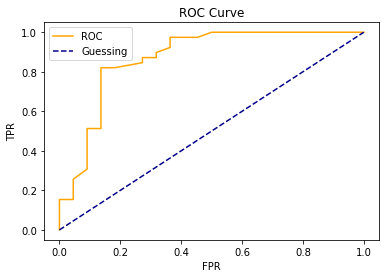

In [36]:
# Create a function for plotting ROC

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the FPR and TPR of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plote line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    
    # Customize plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show

plot_roc_curve(fpr, tpr)

In [37]:
# AUC (Area Under Curve) 

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8706293706293706

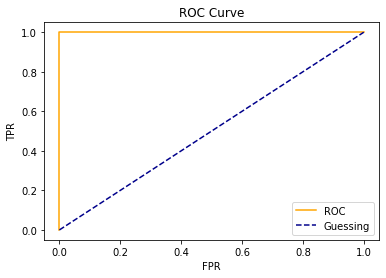

In [38]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [39]:
# Perfect AUC score

roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[18,  4],
       [ 7, 32]], dtype=int64)

In [41]:
# Visualize the matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,18,4
1,7,32


In [42]:
len(y_preds)

61

In [45]:
# Install conda packages into environment 

import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



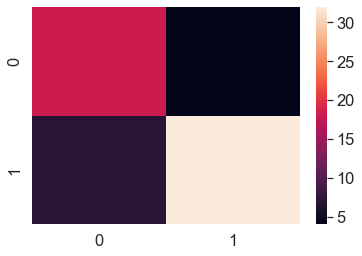

In [46]:
# Visualize confusion matrix using Seaborn's heatmap

import seaborn as sns

# Set font scale

sns.set(font_scale=1.5)

# Create confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)

# Plot

sns.heatmap(conf_mat);

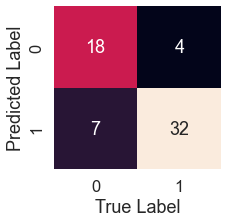

In [47]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar= False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

#### Classification Report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.89      0.82      0.85        39

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [52]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #m model predicts every case is negative

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\GalihDamarJati\Desktop\Project\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GalihDamarJati\Desktop\Project\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GalihDamarJati\Desktop\Project\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Classification metrics summary:

* Accuracy is a good measure to start if the classes are balanced.
* Precision and recall is needed if the classes is unbalanced.
* If FP < FN aim for higher precision.
* If FN < FP aim for higher recall.
* F1-score = combination of precision and recall.

### 4.2.2 Regression Model Evaluation Metrics

Model evaluation metrics doc - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

R^2 compares model predictions to mean of the target. The value ranges from negative infinity to 1. If the model predict the mean of the targets, R^2 value would be 0. If the model perfectly predicts a range of number, R^2 value would be 1.

In [58]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9124687687774722

In [59]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [60]:
y_test.mean()

22.574509803921572

In [61]:
y_test_mean

array([22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745098,
       22.5745098, 22.5745098, 22.5745098, 22.5745098, 22.5745

In [62]:
r2_score(y_test, y_test_mean)

-2.220446049250313e-16

In [63]:
r2_score(y_test, y_test)

1.0

#### MAE

Average of absolute differences between predictions and actual values. Gives an idea how wrong the predictions.

In [64]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.2971568627451

In [68]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
307,28.2,29.926,1.726
343,23.9,27.022,3.122
47,16.6,20.343,3.743
67,22.0,20.593,-1.407
362,20.8,19.640,-1.160
...,...,...,...
92,22.9,23.644,0.744
224,44.8,42.159,-2.641
110,21.7,20.336,-1.364
426,10.2,15.765,5.565


#### MSE

As the name implies it calculates like MAE, but each of the values are squared first.

In [70]:
# Mean squared error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

8.650483078431385

### 4.2.3 Scoring Parmeter

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [75]:
np.random.seed(1)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [76]:
# Cross validated accuracy

print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 81.83%


In [79]:
np.random.seed(1)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 81.83%


In [80]:
# Precision

cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8252542315042316

In [81]:
# Recall

cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [83]:
# F1

cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8425634647276439

Regression model

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(1)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [89]:
np.random.seed(1)

cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6213985846161882

In [88]:
np.random.seed(1)

cv_r2 = cross_val_score(model, x, y, cv=5, scoring="r2")
cv_r2

array([0.76508383, 0.85666735, 0.72982919, 0.47973754, 0.27567501])

In [92]:
# MAE

np.random.seed(1)

cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.11847059, -2.55872277, -3.4110396 , -3.74726733, -3.21931683])

In [93]:
# MSE

np.random.seed(1)

cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -8.1128759 , -13.04853906, -21.63722462, -45.63318345,
       -19.25858223])

In [94]:
np.mean(cv_mse)

-21.53808105167927

### 4.3 Using Different Evaluation Metrics as Sklearn Functions

#### Classification Evaluation Functions

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(1)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make predictions

y_preds = clf.predict(x_test)

# Evaluate classifier

print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set:
Accuracy: 78.69%
Precision: 0.7647058823529411
Recall: 0.8387096774193549
F1: 0.7999999999999999


#### Regression Evaluation Functions

In [99]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(1)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print("Regression metrics on the test set:")
print(f"R2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set:
R2: 0.2884710752688171
MAE: 0.30475409836065587
MSE: 0.1778344262295082


## 5. Improving Model

First predictions = baseline predictions
First model = baseline models

From a data perspective:
* Could we collect more data?
* Could we improve our data?

From a model perspective"
* Is there a better model?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = adjustable settings on a model

Ways to adjust hyperparameters
1. By hand
2. RandomSearchCV
3. GridSearchCV

In [125]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [126]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

In [127]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try to adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [128]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true with y_preds on classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [129]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [130]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

# Shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation, and test

train_split = round(0.7 * len(heart_disease_shuffled)) # 70%
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15%
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions

y_preds = clf.predict(x_valid)

# Evaluate classifier on validation set

baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 93.33%
Precision: 0.96
Recall: 0.93
F1 Score: 0.94


In [131]:
np.random.seed(1)

# Create second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters

y_preds_2 = clf_2.predict(x_valid)

# Evaluate

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 88.89%
Precision: 0.92
Recall: 0.89
F1 Score: 0.91


### 5.2 RandomizedSearchCV

In [133]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(1)

# Split into x y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV

rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimator

In [134]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [135]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.71
Recall: 0.96
F1 Score: 0.82


### 5.3 Hyperparameter Tuning with GridSearchCV

In [121]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'mix_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [136]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [20],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4],
          'min_samples_leaf': [1, 2]}

In [146]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1)


# Split into x y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate

clf = RandomForestClassifier()

# Setup RandomizedSearchCV

gs_clf = GridSearchCV(estimator=clf, 
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV

gs_clf.fit(x_train, y_train);

In [138]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [139]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate predictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.69
Recall: 0.96
F1 Score: 0.81


Compare different models

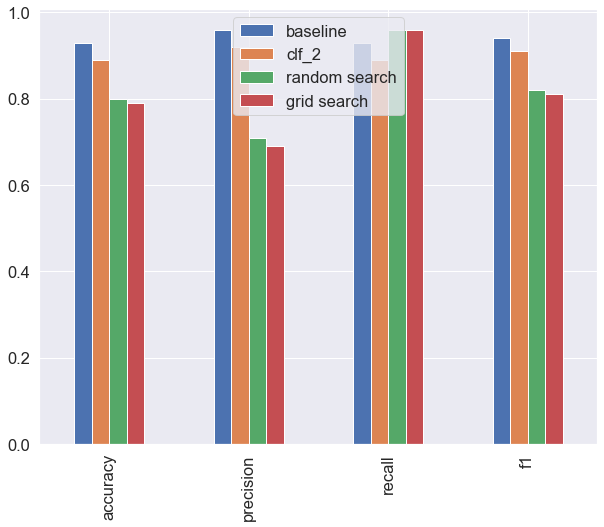

In [141]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and Loading Trained Machine Learning Models

1. Pickle
2. Joblib

Joblib is more efficient on objects that carry large numpy arrays often in the case for fitted sklearn estimator

#### Pickle

In [143]:
import pickle

# Save an existing model

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [144]:
# Load pickle

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [147]:
# Make some predictions

pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.69
Recall: 0.96
F1 Score: 0.81


{'accuracy': 0.79, 'precision': 0.69, 'recall': 0.96, 'f1': 0.81}

#### Joblib

In [149]:
from joblib import dump, load

# Save model to file

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [150]:
# Import

loaded_job = load(filename="gs_random_forest_model_1.joblib")

In [151]:
# Make some predictions

joblib_y_preds = loaded_job.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.69
Recall: 0.96
F1 Score: 0.81


{'accuracy': 0.79, 'precision': 0.69, 'recall': 0.96, 'f1': 0.81}

### 7.Putting It All Together

In [154]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [155]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [156]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps

1. Fill nulls
2. Convert data into numbers
3. Build model

In [158]:
# Getting necessary libs

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup seed

import numpy as np

np.random.seed(1)


# Import data and drop null rows

data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill null, convert to numerical)

preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline

model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data

x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.24139414708324702

Using GridSearchCV or RandomizedSearchCv is also possible with Pipeline

In [160]:
# Use GSCV with regression pipeline

from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [161]:
gs_model.score(x_test, y_test)

0.2952557742045062